In [1]:
%matplotlib inline 

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def photon_counts(N, M, N_atom, N_photon, std=1, N_backg=100, lam_backg=1, plot=True):
    '''
    Generates positions of photon counts from the randomly placed atoms on a lattice and from Poissonian dark counts.
    
    Parameters
    ----------
    N : integer
        number of lattice sites along one direction (NxN)
    M: integer
        number of camera pixels per lattice site along one direction (MxM)
    N_atom: integer
        total number of atoms on the lattice
    std: float
        standard deviation of the Gaussian that is sampled from
    N_photons: integer
        number of photons sampled from an atom
    N_backg: integer
        number of samples drawn from the Poisson distribution for the background noise
    lam_back: float
        expectation interval of the Poisson dark count event
        
    Returns
    -------
    xloc, yloc = array
        x and y positions of all the photon counts
    '''
        
    #Randomly place atoms on the lattice
    atom_location = np.random.choice(np.arange(N*N), N_atom, replace=False) #pick atom position randomly from NxN array
    atom_location_index = (np.unravel_index(atom_location, (N,N)) - np.ones((2, N_atom))*((N-1)/2)) * M #convert the atom location number to x,y atom location index
    x_index = atom_location_index[0,:] #atoms x location
    y_index = atom_location_index[1,:] #atoms y location
    
    #For each atom sample photons from a Gaussian centered on the lattice site, combine the x,y positions of the counts
    x_loc = np.array([])
    y_loc = np.array([])
    for i in range(N_atom):
        xx, yy = np.random.multivariate_normal([x_index[i], y_index[i]], [[std, 0], [0, std]], N_photon).T #at each atom location sample N_photons from a Gaussian
        x_loc = np.concatenate((x_loc, xx)) #combine the sampled x-locations for each atom
        y_loc = np.concatenate((y_loc, yy)) #combine the sampled y-locations for each atom
        
    #Generate dark counts which is the background noise of the camera. Combine dark photon locations with scattered photon locations.
    CCD_x = np.arange(0, N*M, 1) - ((N*M)/2) #x-pixel locations
    CCD_y = np.arange(0, N*M, 1) - ((N*M)/2) #y-pixel locations
    dark_count = np.random.poisson(lam_backg, N_backg) #create dark counts sampling from a Poisson distribution, this gives numbers corresponding to number of dark counts
    dark_count_location_x = np.random.choice(CCD_x, np.sum(dark_count), replace=True) #pick a random x location for the dark counts
    dark_count_location_y = np.random.choice(CCD_y, np.sum(dark_count), replace=True) #pick a random y location for the dark counts
    x_loc = np.concatenate((x_loc, dark_count_location_x)) #combine the sampled x-locations from atoms and dark counts
    y_loc = np.concatenate((y_loc, dark_count_location_y)) #combine the sampled y-locations from atoms and dark counts
    
    #Plot the image (collected photons) on the camera.
    if plot:      
        fig = plt.figure(figsize=(8, 8), dpi=100)
        ax = fig.add_subplot(1,1,1)
        im = plt.plot(x_loc, y_loc, 'ko', markersize=1) #plot counts
        ax.set_xticks(np.arange(0, (N+3)*M, M) - (((N+2)*M)/2)) #vertical lines as visual aid
        ax.set_yticks(np.arange(0, (N+3)*M, M) - (((N+2)*M)/2)) #horizontal lines as visual aid
        ax.grid(True, color="black")
        
    return x_loc, y_loc

Wall time: 26.5 ms


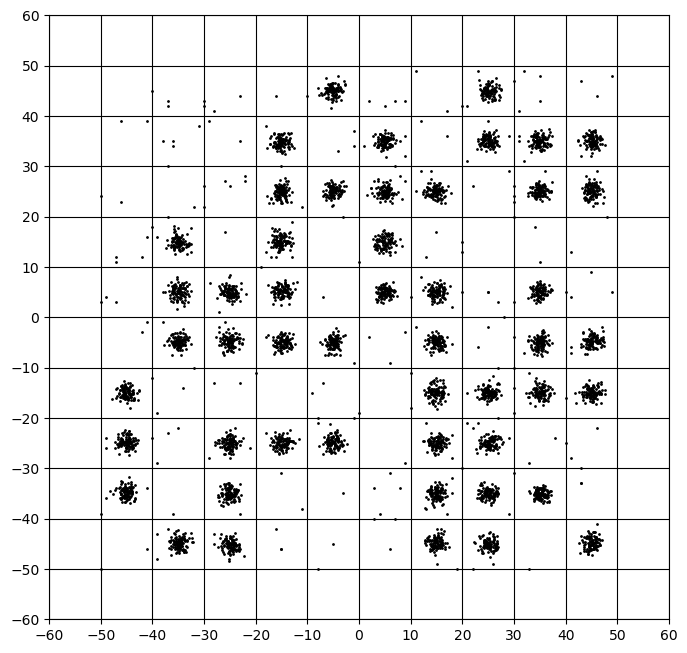

In [32]:
%time x_loc, yloc = photon_counts(N=10, M=10, N_atom=50, N_photon=100, std=1, N_backg=50, lam_backg=5, plot=True)